# Metehan Ayhan - Loan Prediction Project

Bu projenin amacı, bir finans kurumundaki kredi ödeme olasılığı daha düşük olan müşterileri (iyi/kötü) müşteri olarak tahmin eden bir model oluşturmaktır.
Ayrıca, model temelinde kredi başvurusunda bulunurken müşteriye sorulacak soruların belirlenecektir.

<img src='https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png' width='500'>

### Data Dictionary

- Loan ID: Kredi bilgileri için benzersiz bir tanımlayıcı.

- Customer ID: Müşteri için benzersiz bir tanımlayıcı. Müşterilerin birden fazla kredisi olabilir.

- Loan Status: Kredinin geri ödenip ödenmediğini belirten kategorik bir değişken.

- Current Loan Amount: Tamamen ödenen veya temerrüde düşen kredi miktarı.

- Term: Kısa vadeli mi yoksa uzun vadeli mi olduğunu belirten kategorik bir değişken.

- Credit Score: Borç alan kişinin kredi geçmişinin riskliliğini gösteren 0 ile 800 arasında bir değer.

- Years in current job: Müşterinin mevcut işinde kaç yıldır çalıştığını belirten kategorik bir değişken.

- Home Ownership: Müşterinin ev sahipliğini belirten kategorik bir değişken. Değerler "Rent" (Kira), "Home Mortgage" (Konut Kredisi), ve "Own" (Sahip) -olabilir. Eğer değer "OWN" ise, müşteri ipoteksiz bir ev sahibidir.

- Annual Income: Müşterinin yıllık geliri.

- Purpose: Kredinin amacını açıklayan bir tanımlama.

- Monthly Debt: Müşterinin mevcut kredileri için aylık ödeme miktarı.

- Years of Credit History: Müşterinin kredi geçmişindeki ilk kayıttan bu yana geçen yıl sayısı.

- Months since last delinquent: Son kredi gecikmesinden bu yana geçen ay sayısı.

- Number of Open Accounts: Açık olan toplam kredi kartı sayısı.

- Number of Credit Problems: Müşteri kayıtlarındaki kredi problemlerinin sayısı.

- Current Credit Balance: Müşterinin mevcut toplam borç miktarı.

- Maximum Open Credit: Tüm kredi kaynakları için maksimum kredi limiti.

- Bankruptcies: İflas sayısı.

- Tax Liens: Vergi haczi sayısı.

Temerrüde düşmek, bir borçlunun, belirlenen süre içinde borcunu ödeyememesi veya sözleşme koşullarını yerine getirememesi durumudur. 

### Gerekli Paketleri Import Ediyoruz

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns",55)

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [7]:
df=pd.read_csv('LoansTrainingSet.csv')

### EDA - Exploratory Data Analysis

In [9]:
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0


In [10]:
df.shape

(256984, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [12]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [13]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

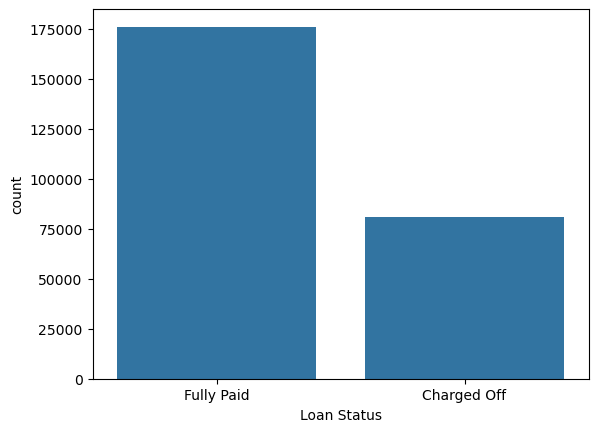

In [14]:
sns.countplot(x=df['Loan Status']);

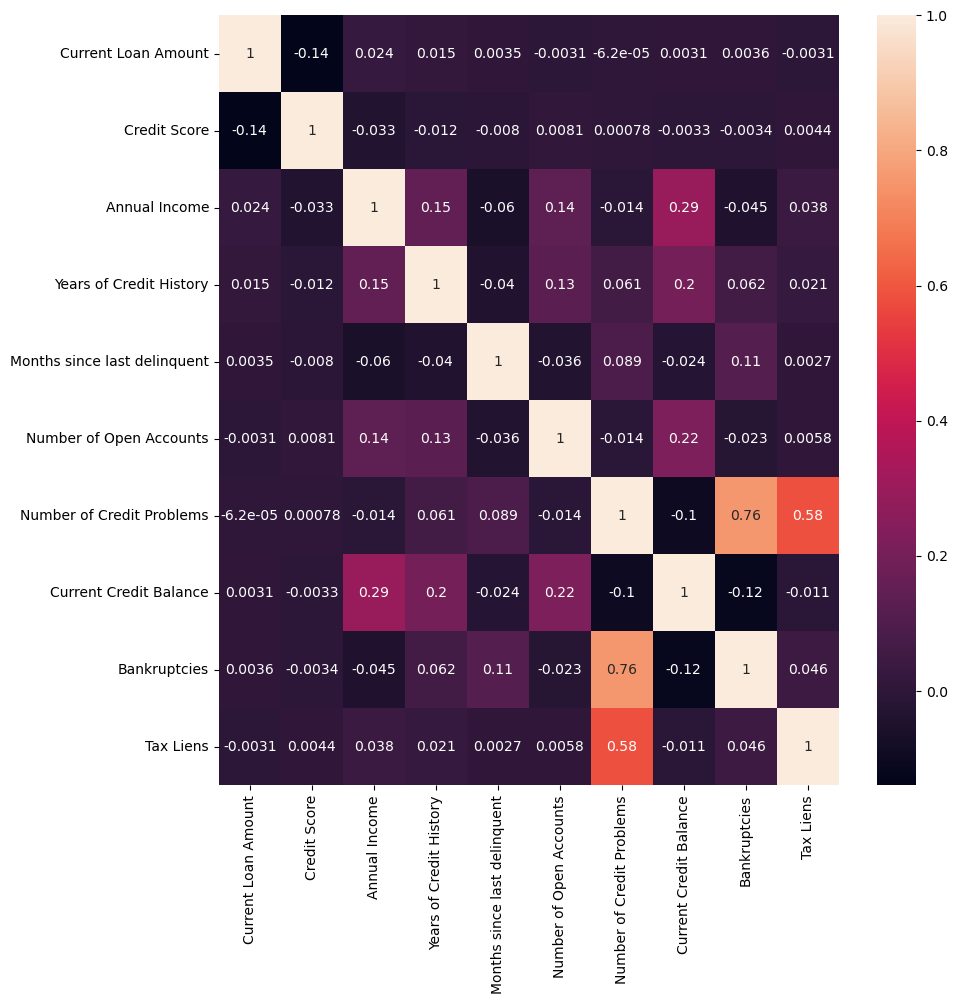

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True);

### Data Preparation

In [17]:
d={'Charged Off':0,'Fully Paid':1}

In [18]:
df['Loan Status']=df['Loan Status'].map(d)

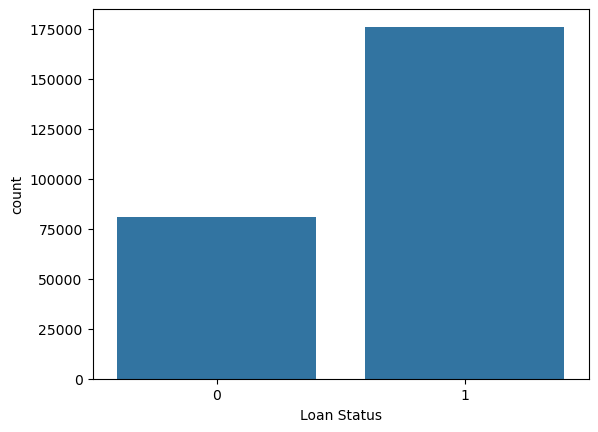

In [19]:
sns.countplot(x=df['Loan Status']);

In [20]:
df['Term'] = df['Term'].map({'Short Term': 0, 'Long Term': 1})

In [21]:
df['Years in current job'] = df['Years in current job'].str.replace(' years', '').str.replace(' year', '')
df['Years in current job'] = df['Years in current job'].str.replace('10+', '10')
df['Years in current job'] = df['Years in current job'].str.replace('< 1', '0.5')
df['Years in current job'] = pd.to_numeric(df['Years in current job'])

In [22]:
df = pd.get_dummies(df, columns=['Home Ownership'], prefix='Home')

In [23]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home_HaveMortgage,Home_Home Mortgage,Home_Own Home,Home_Rent
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,10.0,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,False,True,False,False
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4.0,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,False,True,False,False
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,10.0,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,False,True,False,False
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,10.0,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,False,False,True,False
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4.0,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,False,False,False,True


In [24]:
df['Annual Income'] = df['Annual Income'].replace('[\$,]', '', regex=True).astype(float)
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$,]', '', regex=True).astype(float)

In [25]:
df.columns = df.columns.str.strip()

In [26]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [27]:
df = pd.get_dummies(df, columns=['Purpose'], prefix='Purpose')

In [28]:
df.sample(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home_HaveMortgage,Home_Home Mortgage,Home_Own Home,Home_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
35500,235d0f9d-98c7-4b54-98bc-ddbc45cead8b,49a653a1-8ed2-4476-a0c6-3fdd8d9bbd12,1,11574,0,727.0,3.0,33888.0,833.07,12.8,NaN,7,0,3073,3322,0.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False
114183,7165b9d7-b677-415c-8c2d-2d529c70a92c,aa5f7a23-ea80-4bad-9e50-41f31daaf399,0,19325,1,650.0,8.0,91539.0,1510.39,15.6,9.0,15,0,15547,17489,0.0,0.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False
164297,a378de84-4166-4d8f-892d-a46e68c7b752,77cab7e2-403b-444a-ab6e-00d96b40b277,1,99999999,0,740.0,10.0,53215.0,1064.31,48.1,11.0,9,0,10190,14662,0.0,0.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False


### Missing Data

In [30]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Annual Income                    61676
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Home_HaveMortgage                    0
Home_Home Mortgage                   0
Home_Own Home                        0
Home_Rent                            0
Purpose_Business Loan                0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expen

Months since last delinquent sütununda çok fazla eksik veri var. Bu yüzden bu sütunu siliyoruz.

In [32]:
df = df.drop(['Months since last delinquent'], axis=1)

In [33]:
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Years in current job'].fillna(df['Years in current job'].mean(), inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)
df['Bankruptcies'].fillna(df['Bankruptcies'].mean(), inplace=True)
df['Tax Liens'].fillna(df['Tax Liens'].mean(), inplace=True)

In [34]:
boolean_cols = df.select_dtypes(include=[bool]).columns
df[boolean_cols] = df[boolean_cols].astype(int)

### Feature Engineers

In [36]:
# Müşteriye göre kredi sayısını veya toplam kredi miktarını hesaplayalım
customer_loan_count = df.groupby('Customer ID').size()
customer_total_loan_amount = df.groupby('Customer ID')['Current Loan Amount'].sum()

# Bu bilgileri ana veri çerçevesine ekleyelim
df['Loan Count'] = df['Customer ID'].map(customer_loan_count)
df['Total Loan Amount'] = df['Customer ID'].map(customer_total_loan_amount)


In [37]:
df = df.drop(['Loan ID', 'Customer ID'], axis=1)

In [38]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home_HaveMortgage,Home_Home Mortgage,Home_Own Home,Home_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other,Loan Count,Total Loan Amount
170474,0,21176,0,734.0,8.0,52988.000000,1209.90,17.5,12,0,18061,25296,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,42352
246426,1,9973,0,749.0,3.0,69811.000000,578.85,17.2,11,0,8591,28541,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,9973
139167,1,7803,0,733.0,1.0,71952.716187,1547.64,20.2,14,1,9098,17943,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,7803
224825,1,13671,0,745.0,3.0,47951.000000,1126.86,11.0,11,0,13786,20155,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,13671
94333,1,99999999,0,733.0,3.0,61344.000000,1339.34,18.5,9,0,16594,20846,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,99999999


### Outliers

In [40]:
df.shape

(256984, 30)

<Axes: xlabel='Current Loan Amount', ylabel='Density'>

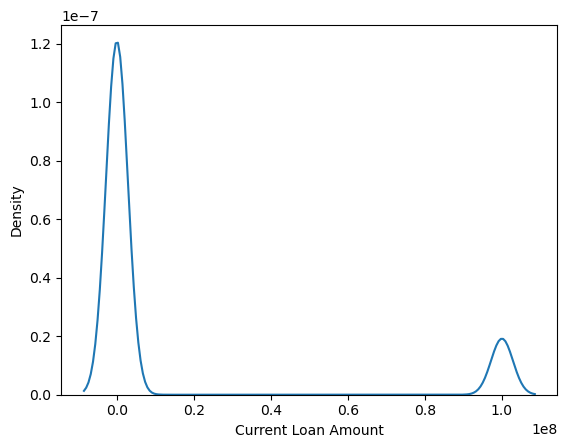

In [41]:
sns.kdeplot(x=df['Current Loan Amount'])

In [42]:
df = df[df['Current Loan Amount'] < 20000]

<Axes: xlabel='Credit Score', ylabel='Density'>

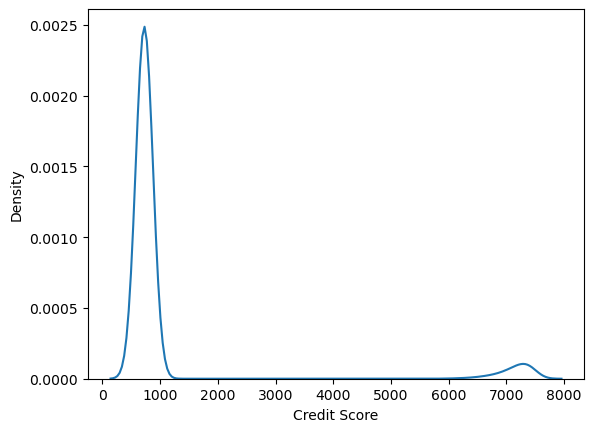

In [43]:
sns.kdeplot(x=df['Credit Score'])

In [44]:
df.loc[df['Credit Score'] > 2000, 'Credit Score'] = df['Credit Score'] / 10

<Axes: xlabel='Number of Open Accounts', ylabel='Density'>

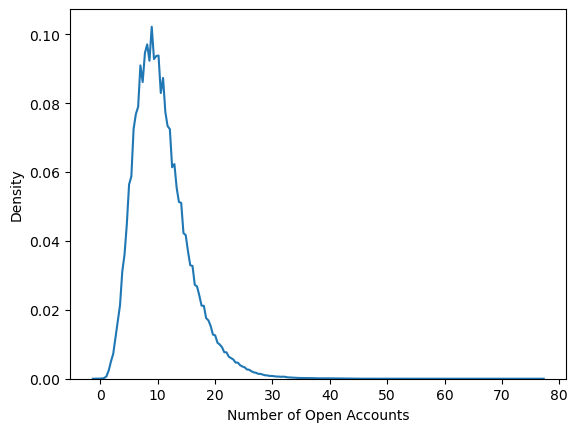

In [45]:
sns.kdeplot(x=df['Number of Open Accounts'])

In [46]:
df = df[df['Number of Open Accounts'] < 40]

<Axes: xlabel='Current Credit Balance', ylabel='Density'>

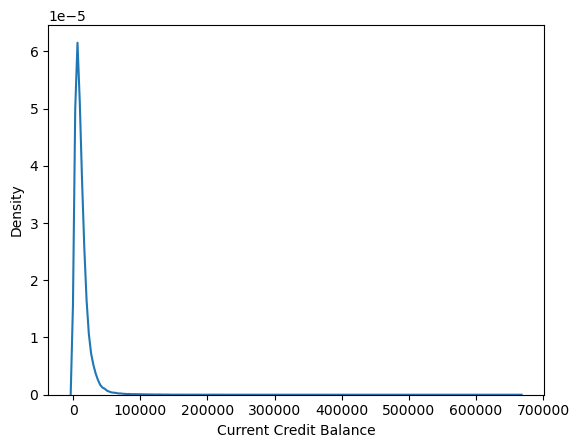

In [47]:
sns.kdeplot(x=df['Current Credit Balance'])

In [48]:
df = df[df['Current Credit Balance'] < 100000]

In [49]:
df = df[df['Current Credit Balance'] >100]

In [50]:
df.shape

(170214, 30)

In [51]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home_HaveMortgage,Home_Home Mortgage,Home_Own Home,Home_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other,Loan Count,Total Loan Amount
191792,1,15375,0,746.0,4.0,67650.000000,642.68,8.8,5,0,6901,17428,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,15375
235904,0,4697,0,718.0,0.5,63609.000000,1325.19,18.7,23,0,12051,33018,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,9394
108928,1,16275,0,744.0,4.0,132236.000000,1928.44,22.5,17,0,14231,21367,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,16275
89730,1,16333,0,733.0,10.0,71952.716187,1178.26,13.6,8,0,21739,29780,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,16333
255019,0,9833,0,740.0,10.0,73748.000000,823.51,13.7,7,1,4617,6586,1.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4,39850


### Modelling

In [53]:
x=df.drop('Loan Status',axis=1)
y=df[['Loan Status']]

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def find_best_classifier(x, y):
    # Veri setini eğitim ve test olarak ayırma
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Kullanılacak modeller
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(),
        "Random Forest": RandomForestClassifier(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier()
    }
    
    best_score = 0
    best_model = None
    
    # Her modelin doğruluğunu hesaplama
    for name, clf in classifiers.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        
        if accuracy > best_score:
            best_score = accuracy
            best_model = clf
    
    print(f"\nBest Model: {best_model.__class__.__name__} with Accuracy: {best_score:.4f}")
    return best_model


In [55]:
#best_model = find_best_classifier(x, y)

Logistic Regression Accuracy: 0.9986

K-Nearest Neighbors Accuracy: 0.9944

Support Vector Machine Accuracy: 0.9986

Random Forest Accuracy: 0.9986

Naive Bayes Accuracy: 0.9907

Decision Tree Accuracy: 0.9971

Best Model: LogisticRegression with Accuracy: 0.9986

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42) 

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
L=LogisticRegression()

In [61]:
L.fit(x_train,y_train)

LogisticRegression()

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
tahmin=L.predict(x_test)

In [64]:
accuracy_score(tahmin,y_test)

0.9986487677349235

In [65]:
confusion_matrix(tahmin,y_test)

array([[11884,     0],
       [   46, 22113]], dtype=int64)

### Result

Sonuç olarak müşterinin krediyi ödeyip ödemeyeceğini %99 doğruluk oranıyla tahmin edebilen bir model geliştirilmiştir. Sonuçlar aşağıdaki Confision Matrixinde gösterilmiştir.

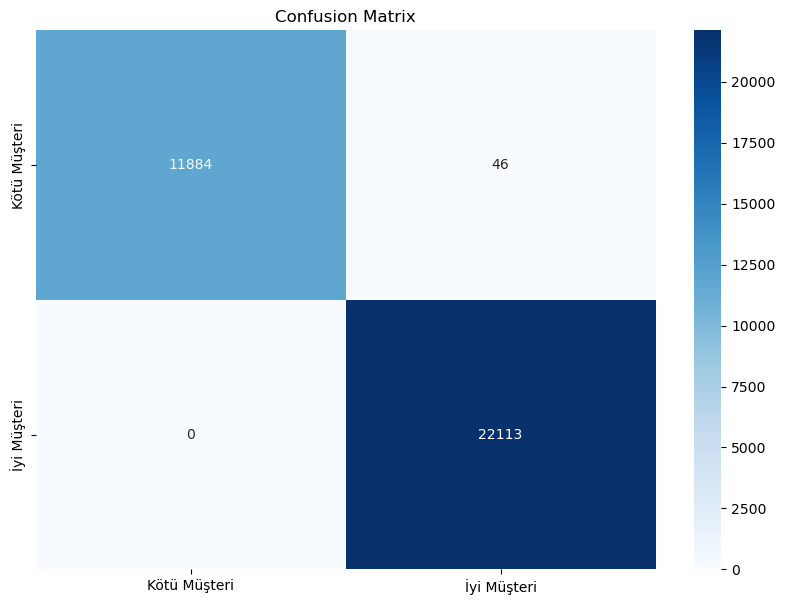

In [68]:
cm = confusion_matrix(y_test, tahmin)

# Karışıklık matrisini görselleştirin
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Kötü Müşteri', 'İyi Müşteri'], 
            yticklabels=['Kötü Müşteri', 'İyi Müşteri'])
plt.title('Confusion Matrix')
plt.show()


In [69]:
abs(df.corr(numeric_only=True)['Loan Status'].sort_values(ascending=False))

Loan Status                     1.000000
Credit Score                    0.236175
Home_Home Mortgage              0.074766
Annual Income                   0.073569
Years of Credit History         0.041081
Purpose_Buy a Car               0.027613
Purpose_Home Improvements       0.025667
Purpose_Other                   0.016630
Years in current job            0.010328
Home_HaveMortgage               0.004635
Current Credit Balance          0.002204
Purpose_Buy House               0.000213
Bankruptcies                    0.000043
Purpose_Debt Consolidation      0.000373
Purpose_Educational Expenses    0.000574
Purpose_Take a Trip             0.002672
Monthly Debt                    0.004226
Number of Credit Problems       0.008427
Tax Liens                       0.008443
Home_Own Home                   0.008542
Purpose_Medical Bills           0.008825
Number of Open Accounts         0.016454
Purpose_other                   0.025831
Purpose_Business Loan           0.037161
Current Loan Amo

### Müşterilere Sorulacak Sorular:

- Kredi skorunuz şu an nedir?
- Toplam Kredi Miktarınız (Total Loan Amount) nedir?
- Birden fazla kredi hesabınız var mı?
- Kredinizin süresi nedir?(Uzun vade, Kısa vade)
- Mevcut kredi miktarınız nedir?